##### 지도학습

#### 분류- 다항분류 

In [4]:
import pandas as pd 
df_TFD = pd.read_csv('../../../../datasets/TitanicFromDisaster_train.csv')
df_TFD[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
df_TFD.columns
df_TFD_extract = df_TFD[['Survived', 'Pclass', 'Age', 'Fare']]
df_TFD_extract.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [7]:
df_TFD_extract_preprocess = df_TFD_extract.dropna()
df_TFD_extract_preprocess[:2]

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833


#### 정형화 

In [8]:
#학습을 위한 목표변수, 설명변수 나누기 -  오늘은 군집까지 가서 평가 후 모델의 성능 올리는 것까지 
#df_TFD_extract_preprocess['Pclass'].value_counts() #3개
target_train = df_TFD_extract_preprocess['Pclass'] #목표변수 
features_train = df_TFD_extract_preprocess.drop(columns=['Pclass']) #설명변수
target_train.shape, features_train.shape #사이즈확인 

((714,), (714, 3))

#### 모델 학습

In [9]:
#트리에 의해 모델이 학습되는 방식 #트리가 성능이 더 좋다 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
model.fit(features_train, target_train) #학습

DecisionTreeClassifier()

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 
#모델이 들어가. 이름이 들어가야 식별 가능. 

In [11]:
features_train.columns.to_list() #pandas장점

['Survived', 'Age', 'Fare']

[Text(0.2615301724137931, 0.9666666666666667, 'Fare <= 10.481\ngini = 0.626\nsamples = 714\nvalue = [186, 173, 355]'),
 Text(0.05517241379310345, 0.9, 'Fare <= 5.619\ngini = 0.033\nsamples = 239\nvalue = [4, 0, 235]'),
 Text(0.041379310344827586, 0.8333333333333334, 'Age <= 29.0\ngini = 0.494\nsamples = 9\nvalue = [4, 0, 5]'),
 Text(0.027586206896551724, 0.7666666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.05517241379310345, 0.7666666666666667, 'Age <= 44.5\ngini = 0.444\nsamples = 6\nvalue = [4, 0, 2]'),
 Text(0.041379310344827586, 0.7, 'Age <= 37.0\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1]'),
 Text(0.027586206896551724, 0.6333333333333333, 'Fare <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.013793103448275862, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.041379310344827586, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.05517241379310345, 0.6333333333333333, 'gini = 0.0\nsamples = 3\nva

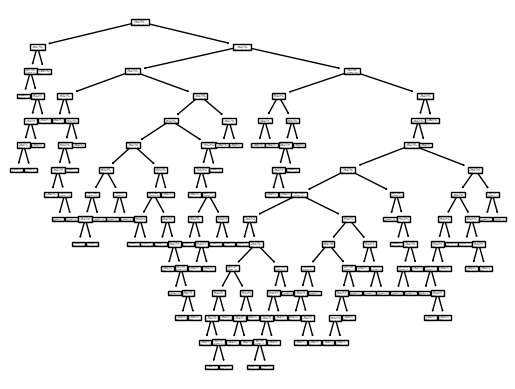

In [12]:
plot_tree(model, feature_names=features_train.columns.to_list()) #수치와 함께 그래프 표시
#feature_names는 리스트형식으로 들어가야해서 미리 바꿔줌 
#각각 설명변수에서 분기를 하기에 적정한 노드를 기점으로 나눠진다
#내부적으로 클래스를 나누기 위한 가장 조건인 설명변수를 가장 위로, 그 밑으로도 쭈욱 항목들이 가지를 쳐서 내려감

In [16]:
%matplotlib tk 
#새창으로 띄우기
plt.figure(figsize=(60, 30))
plot_tree(model, feature_names=features_train.columns.to_list(), filled=True)
plt.show() #그래프만 보기 
#컨디션(맨위)에 따라서-설명변수에서 분기가 가장 적절한 것을 통계적(p-value)로 뽑아내서 그것에 따라 분기, 계속 분기, 가지의 끝부분은 목표변수이며 목표변수의 확률이 value 값이 세개, 하나가 1(목표변수 중에 확률이 가장 높은 것이 선택됨) 
#지니계수- 얼마나 왼쪽인지 오른쪽인지 나타내는 수치, 내려갈수록 0에 가까워짐 

#### 평가 

In [19]:
#내가 학습을 한 답안지와 원래 데이터의 답안지 비교하면 점수 나오는 방식의 분류 
target_predict = model.predict(features_train)
target_predict.shape

(714,)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(target_train, target_predict)
#1.0 #100퍼센트  

1.0